In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [3]:
import os
import sys

# add path
if '../..' in sys.path:
    pass
else:
    sys.path.insert(0, '../..')
    

from loader.greenhouse_loader import GreenhouseLoader

def load_co2_data():
    ghg_loader = GreenhouseLoader()
    cur_dir = os.getcwd()
    os.chdir('../../')
    ghg_loader.load()
    df_ghg = ghg_loader.get_data()
    os.chdir(cur_dir)
    return df_ghg

In [4]:
data = load_co2_data()
ghg_monthly = data['gg_global_monthly']
#print(ghg_monthly)

In [5]:
y = ghg_monthly.loc[:, 'co2 average (micro/mol)']
y.index = pd.to_datetime(y.index) # adjust type of index to datetime

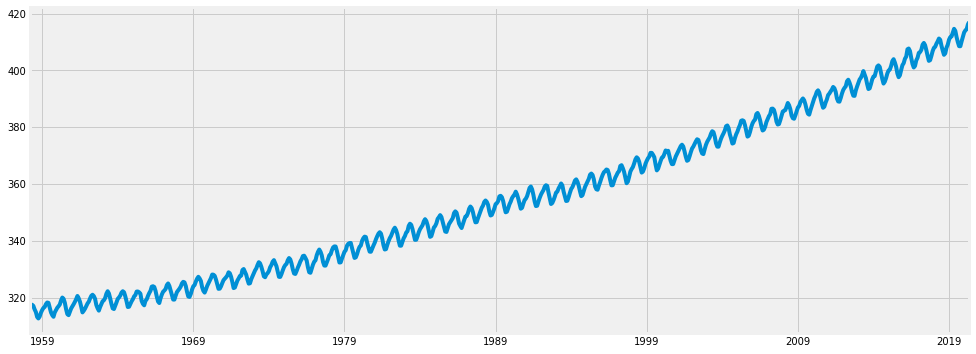

In [6]:
y.plot(figsize=(15, 6))
plt.show()

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [7]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10886.134541599913
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9759.07355668634
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2921.377665959264
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2456.439794169063
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1578.2166946921002
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1572.1048358291505
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1922.539207680644
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1382.1654943258104
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9848.596375471347
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8738.451904084955
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2173.288974420286
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1947.6732334219173
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1186.0701696262017
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1183.9164442128515
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1632.3404791830285
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1074.0918845128347
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2432.2780404407004
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1803.7290361791831


In [9]:
warnings.filterwarnings("ignore") 
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1718      0.081      2.127      0.033       0.013       0.330
ma.L1         -0.5441      0.070     -7.798      0.000      -0.681      -0.407
ar.S.L12       0.0005      0.000      1.619      0.105      -0.000       0.001
ma.S.L12      -0.8621      0.021    -41.797      0.000      -0.903      -0.822
sigma2         0.0942      0.005     20.428      0.000       0.085       0.103


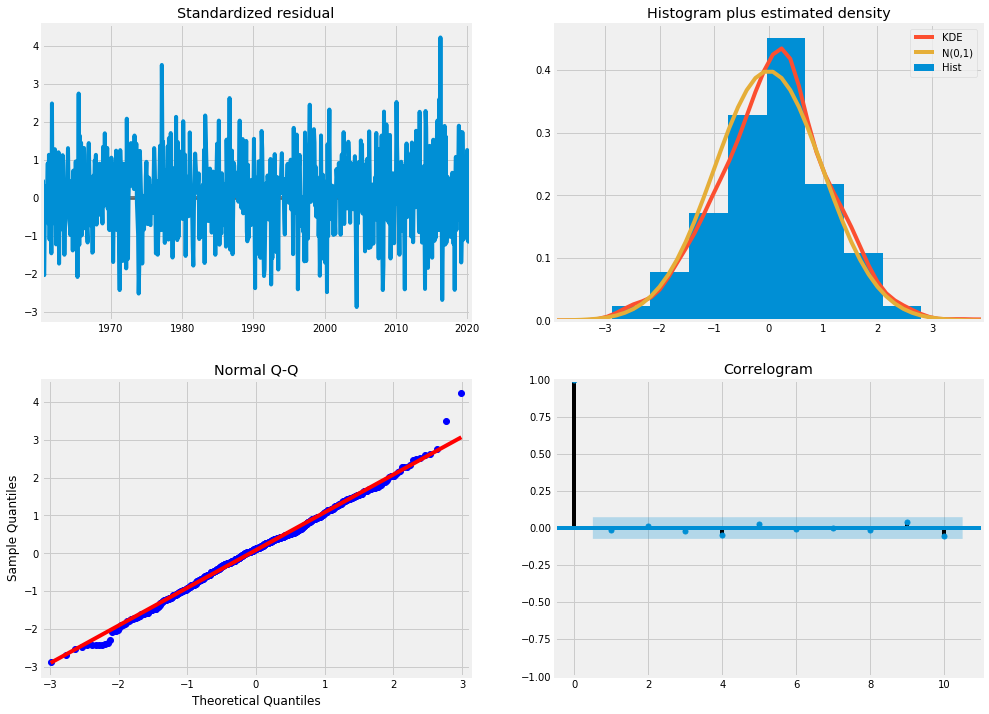

In [10]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [11]:
"""pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()"""

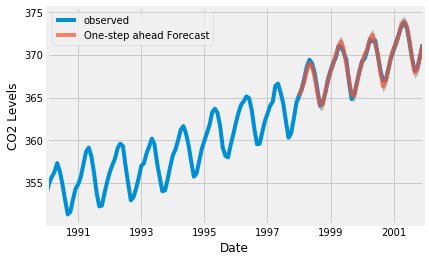

In [12]:
"""ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()"""

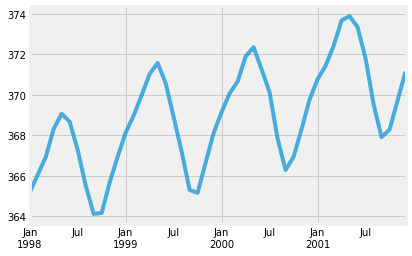

In [13]:
#pred.predicted_mean.plot(label='One-step ahead Forecast', alpha=.7)

In [14]:
"""y_forecasted = pred.predicted_mean
y_truth = y['2020':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))"""

The Mean Squared Error of our forecasts is 0.09


In [10]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

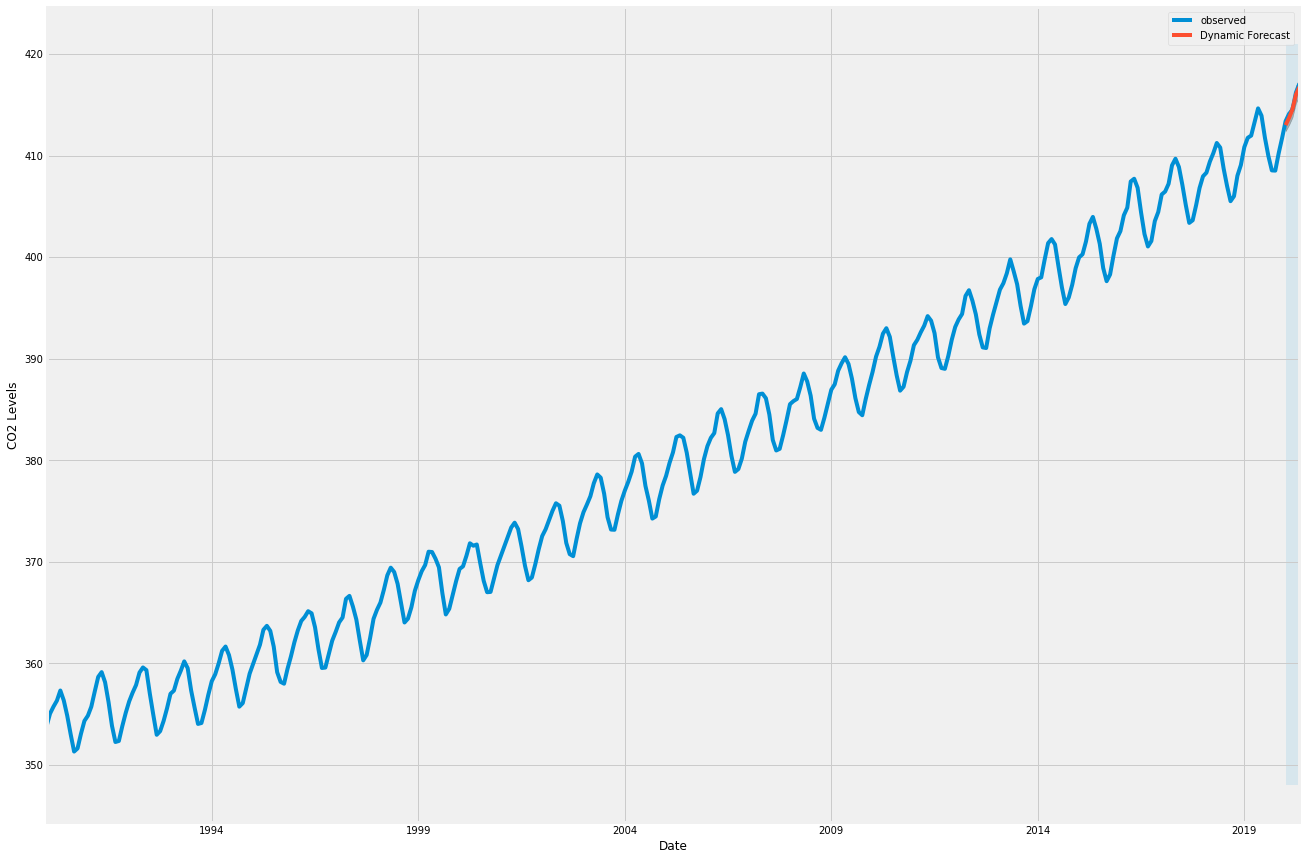

In [11]:
ax = y['2015':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

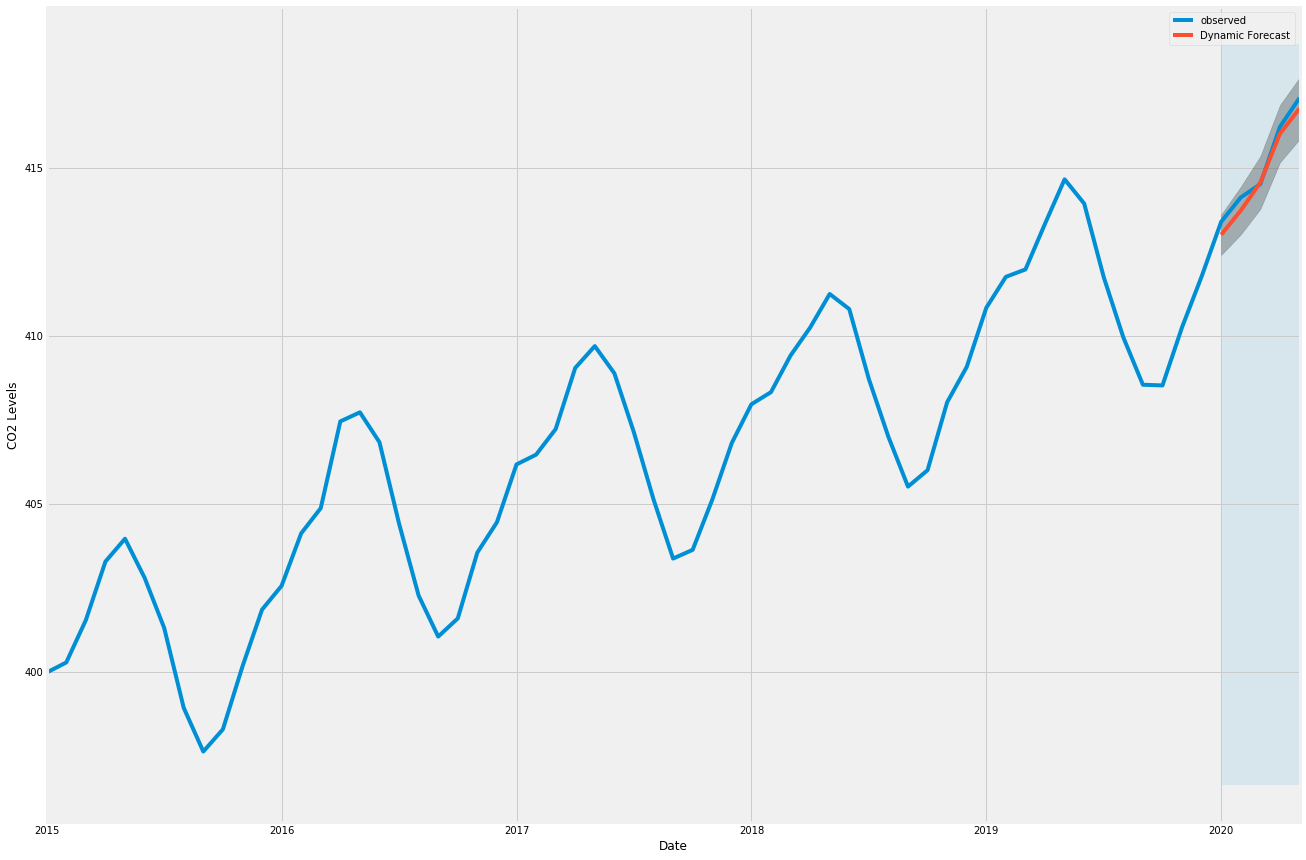

In [53]:
ax = y['2015':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [54]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2020':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.09


In [55]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
ax = y["2015":].plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [15]:
print(y)

1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
1958-07-01    315.86
               ...  
2020-01-01    413.39
2020-02-01    414.11
2020-03-01    414.51
2020-04-01    416.21
2020-05-01    417.07
Name: co2 average (micro/mol), Length: 747, dtype: float64


In [16]:
print(y["2019-01-01":"2019-05-01"])

2019-01-01    410.83
2019-02-01    411.75
2019-03-01    411.97
2019-04-01    413.33
2019-05-01    414.65
Name: co2 average (micro/mol), dtype: float64


In [32]:
np.mean(np.array(y["2020-01-01":"2020-05-01"])-np.array(y["2019-01-01":"2019-05-01"]))

2.5519999999999983

In [33]:
np.mean(np.array(y["2019-01-01":"2019-05-01"])-np.array(y["2018-01-01":"2018-05-01"]))

3.071999999999991

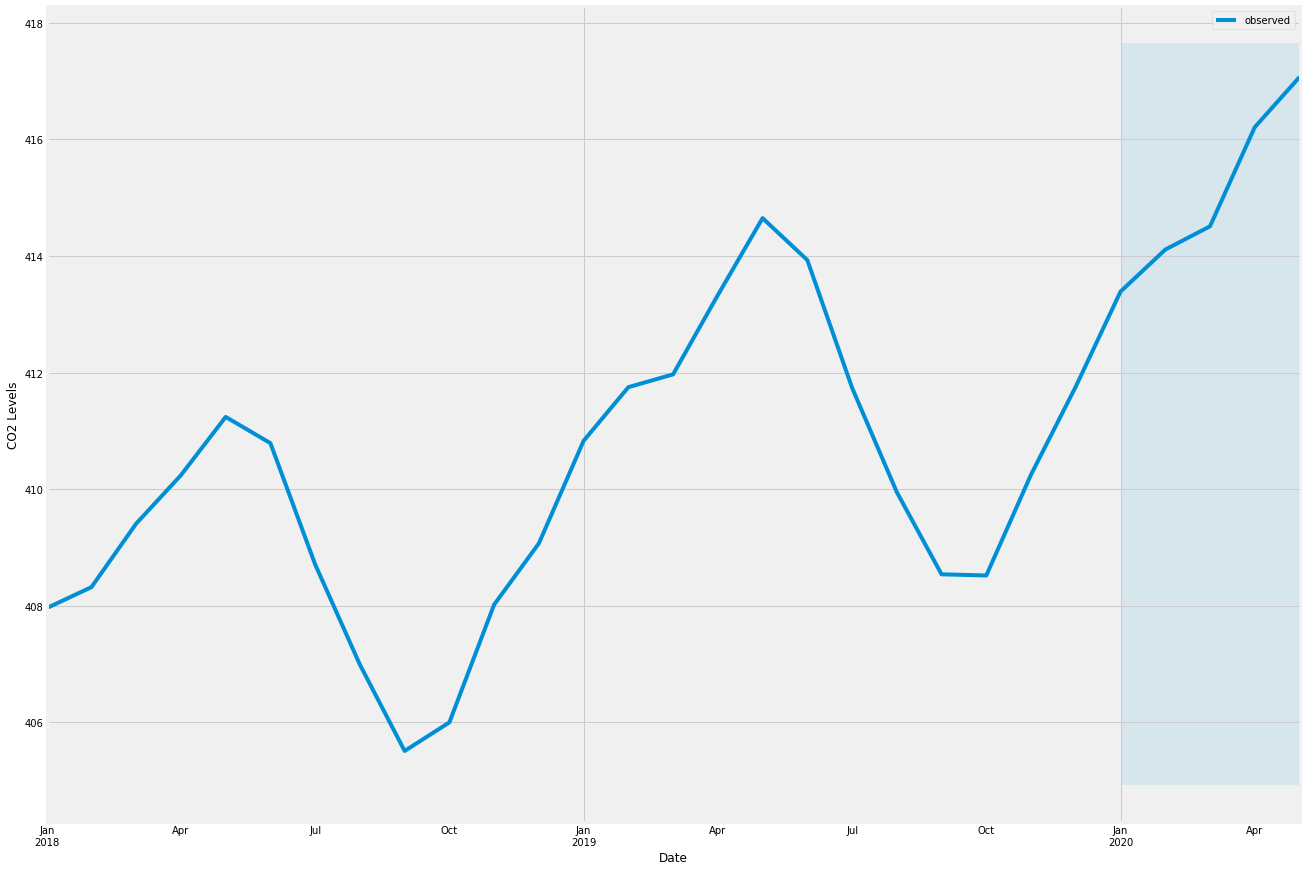

In [27]:
ax = y['2018':].plot(label='observed', figsize=(20, 15))
#pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

#ax.fill_between(pred_dynamic_ci.index,
                #pred_dynamic_ci.iloc[:, 0],
                #pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [42]:
em18 = np.mean(np.array(y["2018"])-np.array(y["2017"]))
em17 = np.mean(np.array(y["2017"])-np.array(y["2016"]))
em16 = np.mean(np.array(y["2016"])-np.array(y["2015"]))
em15 = np.mean(np.array(y["2015"])-np.array(y["2014"]))
em19 = np.mean(np.array(y["2019"])-np.array(y["2018"]))
em20 = np.mean(np.array(y["2020-01-01":"2020-05-01"])-np.array(y["2019-01-01":"2019-05-01"]))



print(em20)
print(em19)
print(em18)
print(em17)
print(em16)
print(em15)

em20/em19

2.5519999999999983
2.9133333333333318
1.968333333333329
2.31416666666667
3.4049999999999963
2.1866666666666768


0.8759725400457664

In [35]:
np.mean(np.array(y["2017"])-np.array(y["2016"]))

2.31416666666667

In [52]:
em16/em18

1.7298899237933973

In [47]:
ems = [36311,36754,37179,37887]

In [51]:
ems[3]/ems[1]

1.0308265766991347